## 多元线性回归
在回归分析中，如果有两个或两个以上的自变量，就称为多元回归。事实上，一种现象常常是与多个因素相联系的，由多个自变量的最优组合共同来预测或估计因变量，比只用一个自变量进行预测或估计更有效，更符合实际。因此多元线性回归比一元线性回归的实用意义更大。

多元线性回归的基本原理和基本计算过程与一元线性回归相同，但由于自变量个数多，计算相当麻烦，一般在实际中应用时都要借助统计软件。

但由于各个自变量的单位可能不一样，比如说一个消费水平的关系式中，工资水平、受教育程度、职业、地区、家庭负担等等因素都会影响到消费水平，而这些影响因素（自变量）的单位显然是不同的，因此自变量前系数的大小并不能说明该因素的重要程度，更简单地来说，同样工资收入，如果用元为单位就比用百元为单位所得的回归系数要小，但是工资水平对消费的影响程度并没有变，所以得想办法将各个自变量化到统一的单位上来。前面学到的标准分就有这个功能，具体到这里来说，就是将所有变量包括因变量都先转化为标准分，再进行线性回归，此时得到的回归系数就能反映对应自变量的重要程度。这时的回归方程称为标准回归方程，回归系数称为标准回归系数，表示如下：
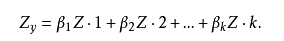

由于都化成了标准分，所以就不再有常数项 a 了，因为各自变量都取平均水平时，因变量也应该取平均水平，而平均水平正好对应标准分 0 ，当等式两端的变量都取 0 时，常数项也就为 0 了。

多元线性回归与一元线性回归类似，可以用最小二乘法估计模型参数，也需对模型及模型参数进行统计检验。
选择合适的自变量是正确进行多元回归预测的前提之一，多元回归模型自变量的选择可以利用变量之间的相关矩阵来解决。

### 案例
Advertising.csv

其数据描述了一个产品的销量与广告媒体的投入之间影响。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#通过read_csv来读取我们的目的数据集
new_adv_data = pd.read_csv("Advertising.csv")
new_adv_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


对于上述的数据可以得到数据中

标签值（sales）：

Sales：对应产品的销量
特征值（TV，Radio，Newspaper）：

TV：对于一个给定市场中单一产品，用于电视上的广告费用（以千为单位）

Radio：在广播媒体上投资的广告费用

Newspaper：用于报纸媒体的广告费用

在这个案例中，通过不同的广告投入，预测产品销量。因为响应变量是一个连续的值，所以这个问题是一个回归问题。数据集一共有200个观测值，每一组观测对应一个市场的情况。接下里对数据进行描述性统计，以及寻找缺失值（缺失值对模型的影响较大，如发现缺失值应替换或删除）,且利用箱图来从可视化方面来查看数据集，在描述统计之后对数据进行相关性分析，以此来查找数据中特征值与标签值之间的关系。


               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000
---------------------
TV           0
radio        0
newspaper    0
sales        0
dtype: int64
---------------------


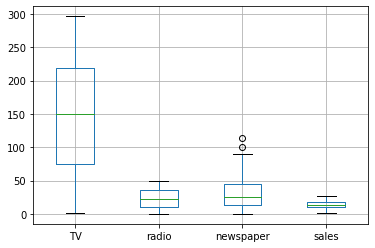

---------------------
                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


In [2]:
#数据描述
print(new_adv_data.describe())
print('---------------------')
#缺失值检验
print(new_adv_data[new_adv_data.isnull()==True].count())
print('---------------------')
new_adv_data.boxplot()
plt.show()
##相关系数矩阵 r(相关系数) = x和y的协方差/(x的标准差*y的标准差) == cov（x,y）/σx*σy
#相关系数0~0.3弱相关0.3~0.6中等程度相关0.6~1强相关
print('---------------------')
print(new_adv_data.corr())

可以从corr表中看出，TV特征和销量是有比较强的线性关系的，而Radio和Sales线性关系弱一些但是也是属于强相关的，Newspaper和Sales线性关系更弱。接下来建立散点图来查看数据里的数据分析情况以及对相对应的线性情况，将使用seaborn的pairplot来绘画3种不同的因素对标签值的影响


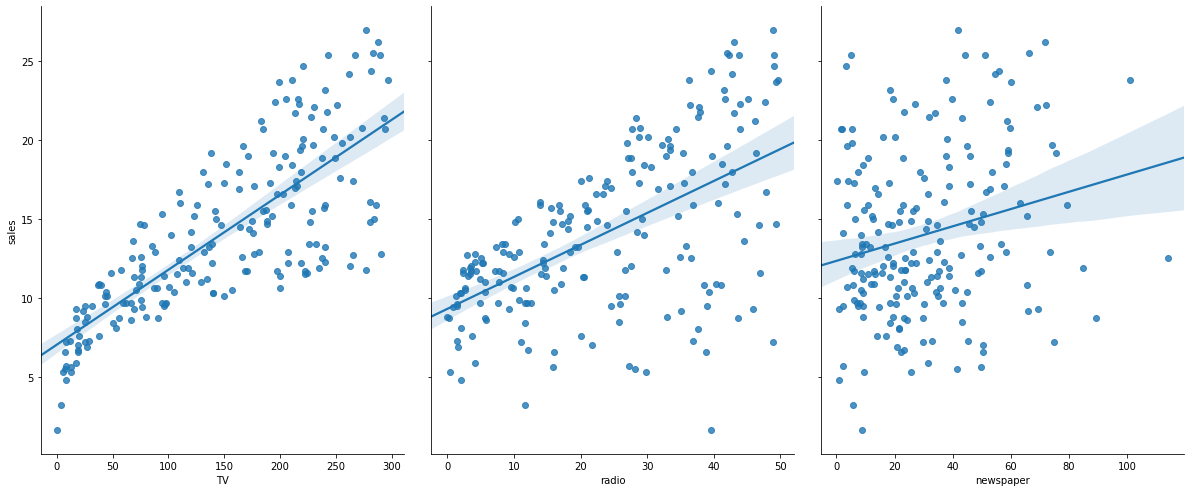

In [3]:
import seaborn as sns
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
sns.pairplot(new_adv_data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.8,kind = 'reg')
plt.show()

上如图种所示，可以了解到不同的因素对销量的预测线（置信度= 95 %），也可可以大致看出不同特征对于标签值的影响与相关关系在了解了数据的各种情况后需要对数据集建立模型，在建立模型的第一步我们将建立训练集与测试集同样的将会使用train_test_split函数来创建（train_test_split是存在与sklearn中的函数）


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(new_adv_data.iloc[:,:3],new_adv_data.sales,train_size=.80)
 
print("原始数据特征:",new_adv_data.iloc[:,:3].shape,
      ",训练数据特征:",X_train.shape,
      ",测试数据特征:",X_test.shape)
 
print("原始数据标签:",new_adv_data.sales.shape,
      ",训练数据标签:",Y_train.shape,
      ",测试数据标签:",Y_test.shape)

原始数据特征: (200, 3) ,训练数据特征: (160, 3) ,测试数据特征: (40, 3)
原始数据标签: (200,) ,训练数据标签: (160,) ,测试数据标签: (40,)


建立初步的数据集模型之后将训练集中的特征值与标签值放入LinearRegression()模型中且使用fit函数进行训练,在模型训练完成之后会得到所对应的方程式（线性回归方程式）需要利用函数中的intercept_与coef_。

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
 
model.fit(X_train,Y_train)
 
a  = model.intercept_#截距
 
b = model.coef_#回归系数
 
print("最佳拟合线:截距",a,",回归系数：",b)


最佳拟合线:截距 2.720177261031008 ,回归系数： [ 0.04631873  0.19199682 -0.00118687]


接下来对数据集进行预测与模型测评。同样使用predict与score函数来获取所需要的预测值与得分。

 

0.8947589602937898
[12.43395238 12.05942181 15.61058912  9.57280661 13.78794215 16.9757256
 16.34374326  3.37336749 20.55346458 13.15024656 12.53774378 18.43592862
 14.14886303 17.61245308 15.05038519 15.12371933 16.50839263 13.81227988
  9.36860706  9.8797159  12.69542462 18.39907465 18.98309971 16.48205606
 20.48114704  6.32546525 15.36143045 10.96467606  8.40427829  7.69748218
 15.11312823 15.29033175  4.29372142 15.53312382 10.51390415 12.69656616
  8.68688339  9.71969278  6.39495971  8.99399274]


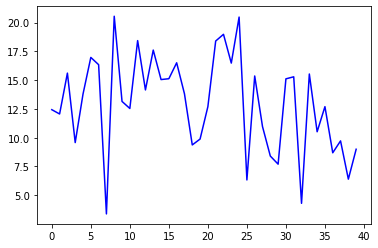

In [6]:
#R方检测
#决定系数r平方
#对于评估模型的精确度
#y误差平方和 = Σ(y实际值 - y预测值)^2
#y的总波动 = Σ(y实际值 - y平均值)^2
#有多少百分比的y波动没有被回归拟合线所描述 = SSE/总波动
#有多少百分比的y波动被回归线描述 = 1 - SSE/总波动 = 决定系数R平方
#对于决定系数R平方来说1） 回归线拟合程度：有多少百分比的y波动刻印有回归线来描述(x的波动变化)
#2）值大小：R平方越高，回归模型越精确(取值范围0~1)，1无误差，0无法完成拟合
score = model.score(X_test,Y_test)
 
print(score)
 
#对线性回归进行预测
 
Y_pred = model.predict(X_test)
 
print(Y_pred)
 
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
#显示图像
plt.show()

预测集与源数据集的对比如下：

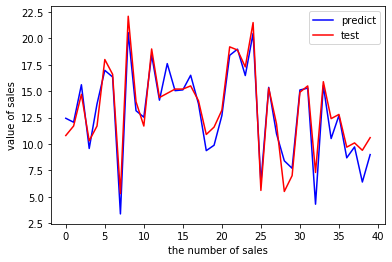

In [7]:

import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()
